In [1]:
# !/usr/bin/env python3

#cd ~/Desktop/snet/gits/lang-learn-repo/alex_tests

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import sys  
import subprocess
import pywt as pywt

from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA

from mpl_toolkits import mplot3d

In [2]:
path = '~/Desktop/snet/gits/lang-learn-repo/alex_tests/data'
filenames = ['bgpclear_first','bgpclear_second','bgpclear_apptraffic_2hourRun','portflap_first']
#dims = 3
#blocks = 3
limit = .95

In [3]:
def pcaSymbolize(df,dim=3,block=3):
    #divs = blocks**dim
    out = df.copy()
    
    for v in out.columns:
        out[v] = (out[v]-min(out[v]))/(max(out[v])-min(out[v]))
        
    out['sym']="R"
    out['num']=0
    
    for d in range(dim):
        out['sym'+str(d)]=0
        for b in range(block):
            out.loc[out.loc[:,out.columns[d]]>(b+1)/float(block),'sym'+str(d)]=b+1
    
    for c in range(dim):
        out['num']=out['num']+out['sym'+str(c)]*(block**(dim-c-1))
    out['sym']=out['sym']+out['num'].astype(str)
    
    return out
            

In [4]:
def pcaPlot(df,dim=3):
    out = df.copy()
    
    for v in out.columns:
        out[v] = (out[v]-min(out[v]))/(max(out[v])-min(out[v]))
        
    if dim==3:
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.scatter3D(out[out.columns[0]], out[out.columns[1]], out[out.columns[2]], c=out[out.columns[-1]], cmap='coolwarm');

/home/alexcasar/miniconda3/envs/ull/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


-7


,sym0,sym1,sym2,sym3,sym4,sym5,sym6
0,R1,R3,R1,R7,R1,R4,R1
1,R1,R3,R1,R7,R1,R4,R1
2,R1,R3,R1,R7,R4,R4,R1
3,R1,R3,R1,R7,R1,R4,R1
4,R1,R3,R1,R7,R4,R1,R1
5,R1,R3,R1,R7,R1,R4,R1
6,R1,R3,R1,R7,R1,R1,R1
7,R1,R3,R1,R7,R1,R4,R1
8,R1,R3,R1,R7,R1,R4,R1
9,R1,R3,R1,R7,R1,R4,R1


anomaly:		 13
non anomaly		 1

diffs
total with rep:		 14
total without rep:	 13
rep:			 1
rep%:			 100.0 %
rep%:			 92.3076923076923 %
------------------------------------------------------
anomaly:		 14
non anomaly		 8

diffs
total with rep:		 22
total without rep:	 16
rep:			 6
rep%:			 75.0 %
rep%:			 62.5 %
------------------------------------------------------
anomaly:		 13
non anomaly		 2

diffs
total with rep:		 15
total without rep:	 13
rep:			 2
rep%:			 100.0 %
rep%:			 84.61538461538461 %
------------------------------------------------------
anomaly:		 15
non anomaly		 4

diffs
total with rep:		 19
total without rep:	 15
rep:			 4
rep%:			 100.0 %
rep%:			 73.33333333333334 %
------------------------------------------------------
anomaly:		 16
non anomaly		 2

diffs
total with rep:		 18
total without rep:	 16
rep:			 2
rep%:			 100.0 %
rep%:			 87.5 %
------------------------------------------------------
anomaly:		 18
non anomaly		 2

diffs
total with rep:		 20
total with

/home/alexcasar/miniconda3/envs/ull/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


-8


,sym0,sym1,sym2,sym3,sym4,sym5,sym6,sym7
0,R0,R3,R3,R1,R1,R0,R3,R4
1,R0,R3,R3,R1,R1,R0,R3,R4
2,R0,R3,R3,R1,R1,R0,R3,R4
3,R0,R3,R3,R1,R1,R0,R3,R4
4,R0,R3,R3,R1,R1,R0,R3,R4
5,R0,R3,R3,R1,R1,R0,R3,R4
6,R0,R3,R3,R1,R1,R0,R3,R4
7,R0,R3,R3,R1,R1,R0,R3,R4
8,R0,R3,R3,R1,R1,R0,R3,R4
9,R0,R3,R3,R1,R1,R0,R3,R4


anomaly:		 12
non anomaly		 3

diffs
total with rep:		 15
total without rep:	 12
rep:			 3
rep%:			 100.0 %
rep%:			 75.0 %
------------------------------------------------------
anomaly:		 12
non anomaly		 1

diffs
total with rep:		 13
total without rep:	 12
rep:			 1
rep%:			 100.0 %
rep%:			 91.66666666666666 %
------------------------------------------------------
anomaly:		 15
non anomaly		 2

diffs
total with rep:		 17
total without rep:	 15
rep:			 2
rep%:			 100.0 %
rep%:			 86.66666666666667 %
------------------------------------------------------
anomaly:		 15
non anomaly		 1

diffs
total with rep:		 16
total without rep:	 15
rep:			 1
rep%:			 100.0 %
rep%:			 93.33333333333333 %
------------------------------------------------------
anomaly:		 15
non anomaly		 5

diffs
total with rep:		 20
total without rep:	 15
rep:			 5
rep%:			 100.0 %
rep%:			 66.66666666666667 %
------------------------------------------------------
anomaly:		 13
non anomaly		 1

diffs
total with rep:	

/home/alexcasar/miniconda3/envs/ull/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/alexcasar/miniconda3/envs/ull/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/alexcasar/miniconda3/envs/ull/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and 

-8


,sym0,sym1,sym2,sym3,sym4,sym5,sym6,sym7
0,R3,R0,R4,R1,R0,R1,R1,R12
1,R3,R0,R4,R1,R0,R1,R1,R12
2,R3,R0,R1,R1,R0,R1,R1,R12
3,R3,R0,R1,R1,R0,R1,R0,R12
4,R3,R0,R1,R1,R0,R1,R0,R12
5,R4,R0,R1,R1,R0,R1,R0,R12
6,R4,R0,R1,R1,R0,R1,R1,R12
7,R4,R0,R1,R1,R0,R1,R0,R12
8,R4,R0,R1,R1,R0,R1,R0,R12
9,R4,R0,R1,R1,R0,R1,R0,R12


anomaly:		 12
non anomaly		 9

diffs
total with rep:		 21
total without rep:	 14
rep:			 7
rep%:			 77.77777777777777 %
rep%:			 50.0 %
------------------------------------------------------
anomaly:		 14
non anomaly		 12

diffs
total with rep:		 26
total without rep:	 15
rep:			 11
rep%:			 91.66666666666667 %
rep%:			 26.66666666666667 %
------------------------------------------------------
anomaly:		 13
non anomaly		 8

diffs
total with rep:		 21
total without rep:	 14
rep:			 7
rep%:			 87.5 %
rep%:			 50.0 %
------------------------------------------------------
anomaly:		 11
non anomaly		 5

diffs
total with rep:		 16
total without rep:	 12
rep:			 4
rep%:			 80.0 %
rep%:			 66.66666666666667 %
------------------------------------------------------
anomaly:		 12
non anomaly		 8

diffs
total with rep:		 20
total without rep:	 13
rep:			 7
rep%:			 87.5 %
rep%:			 46.15384615384615 %
------------------------------------------------------
anomaly:		 12
non anomaly		 9

diffs
total 

/home/alexcasar/miniconda3/envs/ull/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/alexcasar/miniconda3/envs/ull/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/alexcasar/miniconda3/envs/ull/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and 

-7


/home/alexcasar/miniconda3/envs/ull/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


,sym0,sym1,sym2,sym3,sym4,sym5,sym6
0,R3,R1,R4,R19,R1,R4,R1
1,R3,R1,R4,R19,R1,R4,R1
2,R4,R3,R4,R19,R1,R4,R1
3,R1,R3,R1,R19,R0,R4,R1
4,R1,R3,R1,R19,R1,R4,R1
5,R4,R3,R4,R19,R1,R4,R1
6,R3,R3,R4,R19,R1,R4,R1
7,R3,R3,R4,R19,R1,R4,R1
8,R4,R3,R4,R19,R1,R4,R1
9,R4,R3,R4,R19,R4,R4,R1


anomaly:		 20
non anomaly		 6

diffs
total with rep:		 26
total without rep:	 22
rep:			 4
rep%:			 66.66666666666667 %
rep%:			 81.81818181818181 %
------------------------------------------------------
anomaly:		 22
non anomaly		 7

diffs
total with rep:		 29
total without rep:	 22
rep:			 7
rep%:			 100.0 %
rep%:			 68.18181818181819 %
------------------------------------------------------
anomaly:		 21
non anomaly		 7

diffs
total with rep:		 28
total without rep:	 22
rep:			 6
rep%:			 85.71428571428571 %
rep%:			 72.72727272727273 %
------------------------------------------------------
anomaly:		 23
non anomaly		 5

diffs
total with rep:		 28
total without rep:	 24
rep:			 4
rep%:			 80.0 %
rep%:			 83.33333333333334 %
------------------------------------------------------
anomaly:		 25
non anomaly		 6

diffs
total with rep:		 31
total without rep:	 25
rep:			 6
rep%:			 100.0 %
rep%:			 76.0 %
------------------------------------------------------
anomaly:		 16
non anomaly		 5


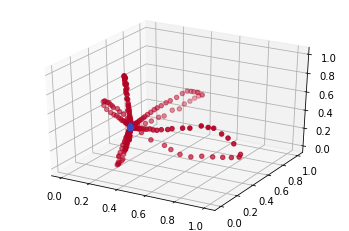

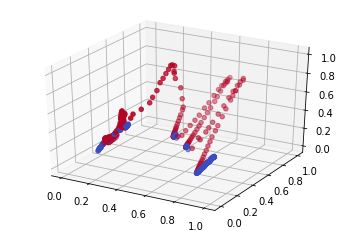

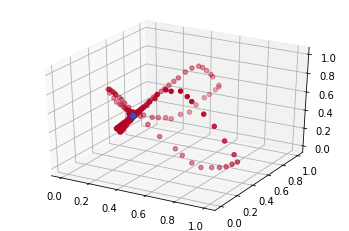

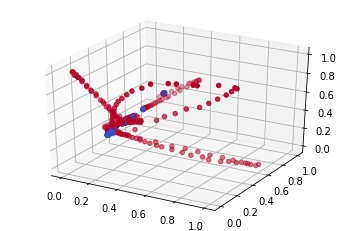

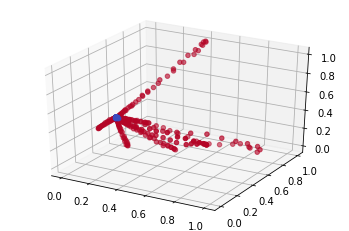

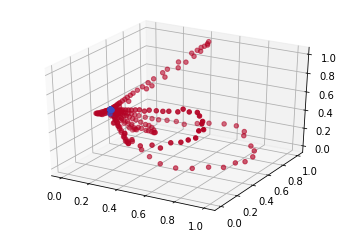

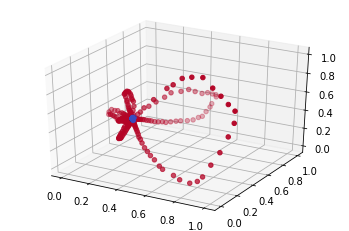

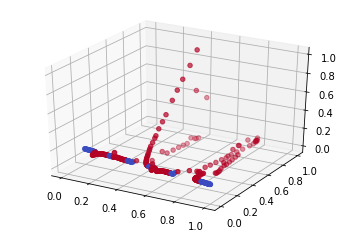

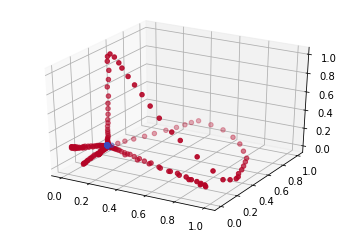

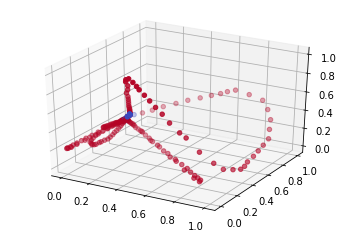

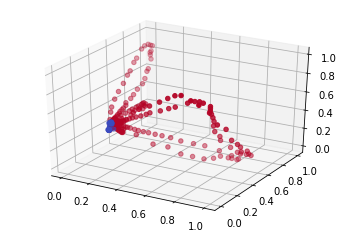

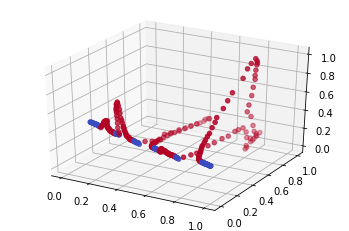

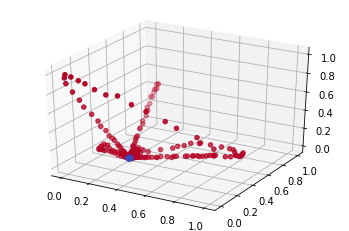

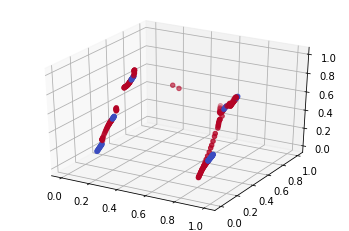

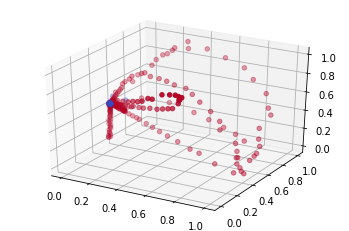

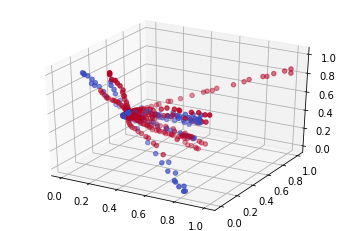

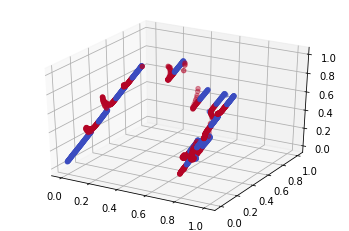

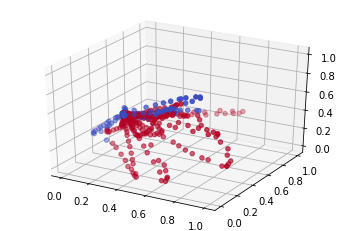

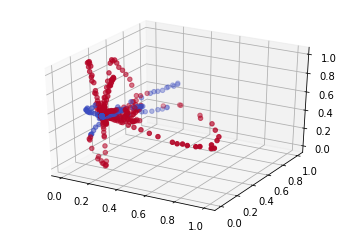

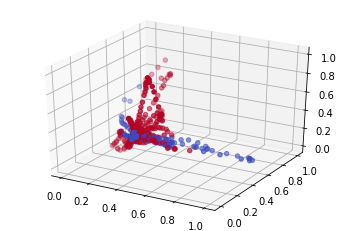

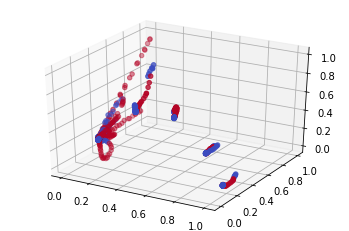

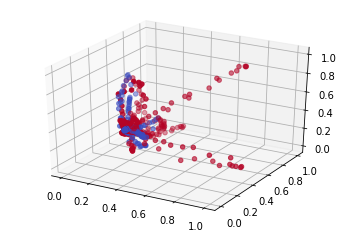

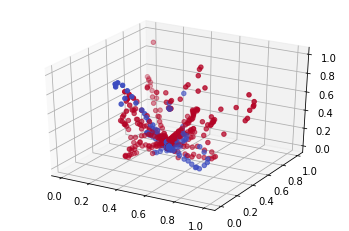

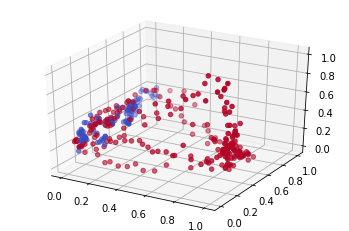

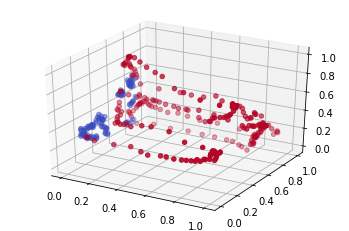

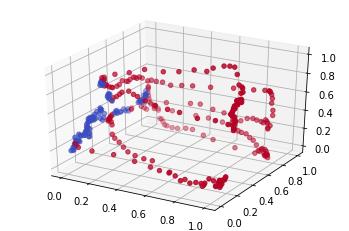

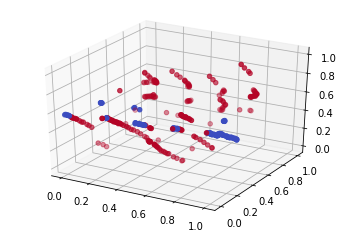

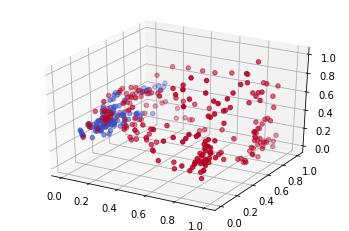

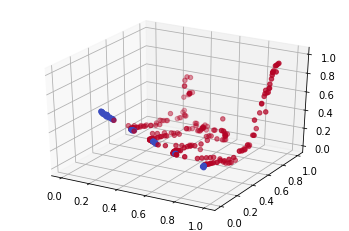

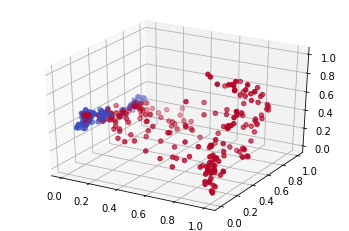

In [5]:
for filename in filenames:
    #filename = filenames[0]
    doc = pd.read_csv(path+"/"+filename+"/all_"+filename+"_raw.csv") 
    clst = pd.read_csv(path+"/"+filename+"/"+filename+"_clusters.csv")

    dataT = doc.copy()

    for v in dataT.columns:
        dataT[v] = (dataT[v]-min(dataT[v]))/(max(dataT[v])-min(dataT[v]))

    dataT = dataT.replace(np.nan,0)
    dataT = dataT.T
    data = dataT.iloc[:-1,:]
    data['clst']=list(clst['cluster'])

    for c in range(max(data['clst'])):
        sub = data.loc[data.loc[:,'clst']==c,data.columns[:-1]]
        sub = sub.T
        
        #Fitting the PCA algorithm with our Data
        pcaT = PCA().fit(sub)
        #plt.figure()
        #plt.plot(np.cumsum(pcaT.explained_variance_ratio_))
        varsum = pd.DataFrame(np.cumsum(pcaT.explained_variance_ratio_))
        #dims = min(10,max(3,len(varsum.loc[limit>varsum.loc[:,0],0])))
        #blocks = max(3,min(10,int(50/dims)))
        dims = 3
        blocks = 3
        
        #plt.xlabel('Number of Components')
        #plt.ylabel('Variance (%)') #for each component
        #plt.xlim(0,dims+1)
        #plt.title('Pulsar Dataset Explained Variance')
        #plt.show()
        
        pca = PCA(n_components=dims)
        pca.fit(sub)
        newSubs = pca.transform(sub)
        newSubs = pd.DataFrame(newSubs)
        newSub = pcaSymbolize(newSubs,dims,blocks)

        data = data.T
        data['sym'+str(c)]=0
        data.loc[:len(newSub['sym']),'sym'+str(c)]=list(newSub['sym'])
        data = data.T

        subput = newSubs.copy()
        subput['anomaly']=list(doc['anomaly'])
        pcaPlot(subput)
        #display(subput['anomaly'].describe())
        
    output = data.T
    lim = -int(max(data['clst']))
    print(lim)
    output = output.loc[output.index[:-1],output.columns[lim:]]
    display(output)

    #output.to_csv(path+"/"+filename+"/"+filename+"_PCA_"+str(dims)+"_"+str(blocks)+".csv",index=False) 
    output['anomaly']=list(doc['anomaly'])
    outSY = output[output['anomaly']==1]
    outSN = output[output['anomaly']==0]
    
    for n in range(len(outSY.columns)):
        groupAns = outSY.groupby(by=outSY.columns[n]).count().iloc[:,0].index
        print('anomaly:\t\t',len(groupAns))
        groupNons = outSN.groupby(by=outSY.columns[n]).count().iloc[:,0].index
        print('non anomaly\t\t',len(groupNons))
        print("\ndiffs")
        listG = list(groupAns)+list(groupNons)
        setG = set(listG)
        print("total with rep:\t\t",len(listG))
        print("total without rep:\t",len(setG))
        print("rep:\t\t\t",len(listG)-len(setG))
        print("rep%:\t\t\t",100*(len(listG)-len(setG))/min(len(groupAns),len(groupNons)),'%')
        print("rep%:\t\t\t",100*(1-(len(listG)-len(setG))/len(setG)),'%')
        print('------------------------------------------------------')
    
    

In [6]:
display(data)

,0,1,2,3,4,5,6,7,8,9,...,338,339,340,341,342,343,344,345,346,clst
HundredGigE0/0/0/0input-data-rate_leaf1,0.714526,0.721823,0.743588,0.737754,0.735684,0.74296,0.731544,0.92768,0.736353,0.754063,...,0.755984,0.748144,0.752827,0.680321,0.759226,0.766272,0.759917,0.769764,0.68697,1
HundredGigE0/0/0/0input-load_leaf1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,7
HundredGigE0/0/0/0input-packet-rate_leaf1,0.266819,0.220479,0.21503,0.2162,0.260216,0.256722,0.228148,0.231893,0.207598,0.163612,...,0.211669,0.215001,0.201424,0.135112,0.115969,0.0730931,0.0653204,0.0777271,0.0470064,2
HundredGigE0/0/0/0output-data-rate_leaf1,0.165499,0.152809,0.140567,0.121448,0.140723,0.198762,0.180426,0.193517,0.185116,0.16388,...,0.182893,0.1996,0.188125,0.181825,0.150917,0.148717,0.178181,0.128135,0.160037,2
HundredGigE0/0/0/0output-load_leaf1,0.1875,0.1875,0.1875,0.125,0.1875,0.25,0.1875,0.1875,0.1875,0.1875,...,0.1875,0.25,0.1875,0.1875,0.1875,0.1875,0.1875,0.125,0.1875,1
HundredGigE0/0/0/0output-packet-rate_leaf1,0.462721,0.380051,0.336226,0.193304,0.248179,0.428074,0.454519,0.540524,0.504254,0.477015,...,0.470469,0.493454,0.474792,0.463163,0.419577,0.403739,0.425521,0.361525,0.495757,2
HundredGigE0/0/0/1input-data-rate_leaf1,0.766785,0.761273,0.753091,0.7407,0.733716,0.718586,0.662169,0.64154,0.633529,0.610703,...,0.738308,0.731914,0.732509,0.73434,0.758591,0.769798,0.795534,0.796954,0.808818,2
HundredGigE0/0/0/1input-load_leaf1,0.756098,0.756098,0.756098,0.731707,0.731707,0.707317,0.658537,0.634146,0.634146,0.609756,...,0.731707,0.731707,0.731707,0.731707,0.756098,0.756098,0.780488,0.780488,0.804878,7
HundredGigE0/0/0/1input-packet-rate_leaf1,0.815565,0.80289,0.795806,0.76331,0.770045,0.775403,0.752678,0.754757,0.741591,0.725959,...,0.761673,0.770892,0.774719,0.768889,0.790082,0.792364,0.805061,0.800961,0.803393,2
HundredGigE0/0/0/1output-data-rate_leaf1,0.315226,0.369255,0.368357,0.483771,0.508911,0.313408,0.433893,0.424334,0.35218,0.436126,...,0.589591,0.520857,0.55888,0.479725,0.565435,0.586406,0.481087,0.557157,0.387677,1


In [7]:
output = data.T
output = output.loc[output.index[:-1],output.columns[-7:]]
output['anomaly']=list(doc['anomaly'])
outSY = output[output['anomaly']==1]
outSN = output[output['anomaly']==0]
display(output)

,sym0,sym1,sym2,sym3,sym4,sym5,sym6,anomaly
0,R3,R1,R4,R19,R1,R4,R1,0
1,R3,R1,R4,R19,R1,R4,R1,0
2,R4,R3,R4,R19,R1,R4,R1,0
3,R1,R3,R1,R19,R0,R4,R1,0
4,R1,R3,R1,R19,R1,R4,R1,0
5,R4,R3,R4,R19,R1,R4,R1,0
6,R3,R3,R4,R19,R1,R4,R1,0
7,R3,R3,R4,R19,R1,R4,R1,0
8,R4,R3,R4,R19,R1,R4,R1,0
9,R4,R3,R4,R19,R4,R4,R1,0


In [8]:
output['anomaly']=list(doc['anomaly'])
outSY = output[output['anomaly']==1]
outSN = output[output['anomaly']==0]

In [9]:
for n in range(len(outSY.columns)):
    print('anomaly')
    groupAns = outSY.groupby(by=outSY.columns[n]).count().iloc[:,0].index
    print(len(groupAns))
    print('non anomaly')
    groupNons = outSN.groupby(by=outSY.columns[n]).count().iloc[:,0].index
    print(len(groupNons))
    print("diffs")
    listG = list(groupAns)+list(groupNons)
    setG = set(listG)
    print("total with rep:\t\t",len(listG))
    print("total without rep:\t",len(setG))
    print("rep:\t\t\t",len(listG)-len(setG))

anomaly
20
non anomaly
6
diffs
total with rep:		 26
total without rep:	 22
rep:			 4
anomaly
22
non anomaly
7
diffs
total with rep:		 29
total without rep:	 22
rep:			 7
anomaly
21
non anomaly
7
diffs
total with rep:		 28
total without rep:	 22
rep:			 6
anomaly
23
non anomaly
5
diffs
total with rep:		 28
total without rep:	 24
rep:			 4
anomaly
25
non anomaly
6
diffs
total with rep:		 31
total without rep:	 25
rep:			 6
anomaly
16
non anomaly
5
diffs
total with rep:		 21
total without rep:	 16
rep:			 5
anomaly
22
non anomaly
5
diffs
total with rep:		 27
total without rep:	 22
rep:			 5
anomaly
1
non anomaly
1
diffs
total with rep:		 2
total without rep:	 2
rep:			 0


In [10]:
clsts = pd.read_csv(path+"/"+filenames[0]+"/"+filenames[0]+"_clusters.csv")
for filename in filenames[1:]:
    clst = pd.read_csv(path+"/"+filename+"/"+filename+"_clusters.csv")
    clsts = pd.merge(clsts,clst, on='var')
clsts.columns = ['var']+filenames
clsts = clsts.sort_values(by='var')
display(clsts)

,var,bgpclear_first,bgpclear_second,bgpclear_apptraffic_2hourRun,portflap_first
114,HundredGigE0/0/0/0bytes-received_leaf1,1,0,1,7
225,HundredGigE0/0/0/0bytes-received_leaf2,1,6,1,3
511,HundredGigE0/0/0/0bytes-received_leaf6,1,6,1,5
607,HundredGigE0/0/0/0bytes-received_leaf7,1,6,1,3
702,HundredGigE0/0/0/0bytes-received_leaf8,1,6,1,3
1027,HundredGigE0/0/0/0bytes-received_spine3,1,4,1,7
1325,HundredGigE0/0/0/0bytes-received_spine4,1,0,1,3
115,HundredGigE0/0/0/0bytes-sent_leaf1,1,0,1,7
226,HundredGigE0/0/0/0bytes-sent_leaf2,1,6,1,3
512,HundredGigE0/0/0/0bytes-sent_leaf6,1,2,1,5
